In [269]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [270]:
class data:
    def __init__(self):       
        self.col_names = ['marketplace', 'customer_id', 'review_id', 'product_id', 'product_parent', 'product_title', 'product_category', 'star_rating', 'helpful_votes', 'total_votes', 'vine', 'verified_purchase', 'review_headline', 'review_body', 'review_date']
        self.use_cols = ['customer_id', 'product_id', 'product_parent', 'product_category', 'star_rating', 'helpful_votes', 'total_votes', 'vine', 'verified_purchase', 'review_date']
    
    def read_data(self):
        use_cols = self.use_cols
        self.jewelry = pd.read_table('amazon_reviews_us_Jewelry_v1_00.tsv', usecols = use_cols, low_memory = False)
        self.book = pd.read_table('amazon_reviews_us_Books_v1_02.tsv', usecols = use_cols, low_memory = False)
        self.kitchen = pd.read_table('amazon_reviews_us_Kitchen_v1_00.tsv', usecols = use_cols, low_memory = False)
        self.lawn = pd.read_table('amazon_reviews_us_Lawn_and_Garden_v1_00.tsv', usecols = use_cols, low_memory = False)
        self.pet = pd.read_table('amazon_reviews_us_Pet_Products_v1_00.tsv', usecols = use_cols, low_memory = False)
        self.wireless = pd.read_table('amazon_reviews_us_Wireless_v1_00.tsv', usecols = use_cols, low_memory = False)

    def get_data(self): 
        self.read_data()
        frames = [self.jewelry, self.book, self.kitchen, self.lawn, self.pet, self.wireless]
        reviews = pd.concat(frames)
        return reviews, frames

In [271]:
reviews, frames = data().get_data()
print('Data Loaded')
print('Shape of data:', reviews.shape)
print()
print(reviews.head())

Data Loaded
Shape of data: (23934720, 10)

   customer_id  product_id  product_parent product_category star_rating  \
0     50423057  B00JWXFDMG       657335467          Jewelry           5   
1     11262325  B00W5T1H9W        26030170          Jewelry           5   
2     27541121  B00M2L6KFY       697845240          Jewelry           5   
3      5350721  B0006SW2WU       569859289          Jewelry           5   
4     24484424  B009YPDW70       332947422          Jewelry           5   

   helpful_votes  total_votes vine verified_purchase review_date  
0            0.0          0.0    N                 Y  2015-08-31  
1            0.0          0.0    N                 N  2015-08-31  
2            0.0          0.0    N                 Y  2015-08-31  
3            0.0          0.0    N                 Y  2015-08-31  
4            0.0          0.0    N                 Y  2015-08-31  


EDA:
#different number of customers bucket
#different number of product parent bucket
#product id bucket
#count of reviews per product category
#num of reviews per star
#avg rating per category
#helpful votes bucket
#number of helpful votes per category
#total votes per category
#total votes bucket
#number of verified purchases
#number of verified purchases/category
#break reviewes by month
#break reviewes by month per category

#average rating of each category over the years
#Which star ratings (1–5) are the most helpful?
#length of review per categotry
#number of reviews per len

In [275]:
class eda:
    def __init__(self, data, frames = []):
        ''' 1 review
            2 - 5 reviews
            5 - 10 reviews
            11 - 20 reviews
            21 - 50 reviews
            51 - 100 reviews
            101 - 500 reviews
            501 - 1000 reviews
            1001 - 5000 reviews
            5001 - 10000 reviews
            10000+ reviews
        '''
        self.plot_dict = {
            '1': 0,
            '2 - 5': 0,
            '6 - 10': 0,
            '11 - 20': 0,
            '21 - 50': 0,
            '51 - 100': 0,
            '101 - 500': 0,
            '501 - 1000': 0,
            '1001 - 5000': 0,
            '5001 - 10000': 0,
            '10000+': 0
        }
        self.data_list = {
            1: 'Jewelry', 2: 'Book', 3: 'Kitchen', 4: 'Lawn', 5: 'Pet', 6: 'Wireless'
        }
        self.reviews = data
        self.frames = frames
        
        self.customer_bucket()
        self.product_parent_bucket()
        self.product_id_bucket()
        self.category_count()
        self.star_count()
        self.avg_star_category()
        self.helpful_votes()
        self.helpful_votes_category()
        self.total_votes()
        self.total_votes_category()
        self.verified()
        self.verified_category()
        self.months()
        self.months_category()
        
    def plot(self, plot_dict, x_label, y_label, title):
        f = plt.figure()
        f.set_figwidth(15)
        f.set_figheight(10)
        plt.bar(plot_dict.keys(), plot_dict.values())
        for index, value in enumerate(plot_dict.values()): 
            plt.text(index, value, str(value))
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.title(title)
        plt.show()
        
    def star_count_util(self, data, just_category = False):
        plot_dict = {1:0, 2:0, 3:0, 4:0, 5:0}
        dict_temp = data['star_rating'].value_counts().to_dict()
        if just_category: return dict_temp
        plot_dict[1] = dict_temp['1'] + dict_temp[1.0]
        plot_dict[2] = dict_temp['2'] + dict_temp[2.0]
        plot_dict[3] = dict_temp['3'] + dict_temp[3.0]
        plot_dict[4] = dict_temp['4'] + dict_temp[4.0]
        plot_dict[5] = dict_temp['5'] + dict_temp[5.0]
        return plot_dict
    
    def months_util(self, data = []):
        months = []
        dates = data['review_date'].to_numpy()
        for date in dates:
            try:
                months.append(date.split('-')[1])
            except:
                pass
        return months
        
    def customer_bucket(self):
        plot_dict = self.plot_dict
        reviews = self.reviews
        index, counts = np.unique(reviews['customer_id'], return_counts = True)
        for i in counts:
            if (i == 1): plot_dict['1'] += 1
            elif (i > 1 and i <= 5): plot_dict['2 - 5'] += 1
            elif (i > 5 and i <= 10): plot_dict['6 - 10'] += 1
            elif (i > 10 and i <= 20): plot_dict['11 - 20'] += 1
            elif (i > 21 and i <= 50): plot_dict['21 - 50'] += 1
            elif (i > 51 and i <= 100): plot_dict['51 - 100'] += 1
            elif (i > 101 and i <= 500): plot_dict['101 - 500'] += 1
            elif (i > 501 and i <= 1000): plot_dict['501 - 1000'] += 1
            elif (i > 1001 and i <= 5000 ): plot_dict['1001 - 5000'] += 1
            elif (i > 5001 and i <= 10000): plot_dict['5001 - 10000'] += 1
            elif (i > 10000): plot_dict['10000+'] += 1
        self.plot(plot_dict, 'Reviews', 'Customers', 'Review count by Customer')
        
    def product_parent_bucket(self):
        plot_dict = self.plot_dict
        reviews = self.reviews
        index, counts = np.unique(reviews['product_parent'], return_counts = True)
        for i in counts:
            if (i == 1): plot_dict['1'] += 1
            elif (i > 1 and i <= 5): plot_dict['2 - 5'] += 1
            elif (i > 5 and i <= 10): plot_dict['6 - 10'] += 1
            elif (i > 10 and i <= 20): plot_dict['11 - 20'] += 1
            elif (i > 21 and i <= 50): plot_dict['21 - 50'] += 1
            elif (i > 51 and i <= 100): plot_dict['51 - 100'] += 1
            elif (i > 101 and i <= 500): plot_dict['101 - 500'] += 1
            elif (i > 501 and i <= 1000): plot_dict['501 - 1000'] += 1
            elif (i > 1001 and i <= 5000 ): plot_dict['1001 - 5000'] += 1
            elif (i > 5001 and i <= 10000): plot_dict['5001 - 10000'] += 1
            elif (i > 10000): plot_dict['10000+'] += 1
        self.plot(plot_dict, 'Reviews', 'Parent Product', 'Review count by Parent Product')
    
    def product_id_bucket(self):
        plot_dict = self.plot_dict
        reviews = self.reviews
        index, counts = np.unique(reviews['product_id'], return_counts = True)
        for i in counts:
            if (i == 1): plot_dict['1'] += 1
            elif (i > 1 and i <= 5): plot_dict['2 - 5'] += 1
            elif (i > 5 and i <= 10): plot_dict['6 - 10'] += 1
            elif (i > 10 and i <= 20): plot_dict['11 - 20'] += 1
            elif (i > 21 and i <= 50): plot_dict['21 - 50'] += 1
            elif (i > 51 and i <= 100): plot_dict['51 - 100'] += 1
            elif (i > 101 and i <= 500): plot_dict['101 - 500'] += 1
            elif (i > 501 and i <= 1000): plot_dict['501 - 1000'] += 1
            elif (i > 1001 and i <= 5000 ): plot_dict['1001 - 5000'] += 1
            elif (i > 5001 and i <= 10000): plot_dict['5001 - 10000'] += 1
            elif (i > 10000): plot_dict['10000+'] += 1 
        self.plot(plot_dict, 'Reviews', 'Product ID', 'Review count by Product ID')
    
    def category_count(self):
        pos_list = []
        reviews = self.reviews
        index, counts = np.unique(reviews['product_category'], return_counts = True)
        for pos, value in enumerate(counts):
            if value <= 2:
                pos_list.append(pos)
        index = np.delete(index, pos_list)
        counts = np.delete(counts, pos_list)
        plot_dict = dict(zip(index, counts))
        self.plot(plot_dict, 'Category', 'Reviews', 'Review per Category')
        
    def star_count(self):
        reviews = self.reviews
        plot_dict = self.star_count_util(reviews)
        self.plot(plot_dict, 'Stars', 'Reviews', 'Review per Stars')
    
    def avg_star_category(self):
        def avg(rating_dict):
            if '5' in rating_dict:
                return (rating_dict['5'] * 5 + rating_dict['4'] * 4 + rating_dict['3'] * 3 + rating_dict['2'] * 2 + rating_dict['1']) / sum(rating_dict.values())  
            return (rating_dict[5.0] * 5 + rating_dict[4.0] * 4 + rating_dict[3.0] * 3 + rating_dict[2.0] * 2 + rating_dict[1.0]) / sum(rating_dict.values())
        plot_dict = {
            'Jewelry': avg(self.star_count_util(self.frames[0], just_category = True)),
            'Book': avg(self.star_count_util(self.frames[1], just_category = True)),
            'Kitchen': avg(self.star_count_util(self.frames[2], just_category = True)),
            'Lawn': avg(self.star_count_util(self.frames[3], just_category = True)),
            'Pet': avg(self.star_count_util(self.frames[4], just_category = True)),
            'Wireless': avg(self.star_count_util(self.frames[5], just_category = True))
        }        
        self.plot(plot_dict, 'Category', 'Avg Rating', 'Avg rating per category')    
        
    def helpful_votes(self):
        pos_list = []
        plot_dict = self.plot_dict
        reviews = self.reviews
        index, counts = np.unique(reviews['helpful_votes'], return_counts = True)
        for pos, value in enumerate(index):
            if math.isnan(value):
                pos_list.append(pos)
        index = np.delete(index, pos_list)
        counts = np.delete(counts, pos_list)
        for i in counts:
            if (i == 1): plot_dict['1'] += 1
            elif (i > 1 and i <= 5): plot_dict['2 - 5'] += 1
            elif (i > 5 and i <= 10): plot_dict['6 - 10'] += 1
            elif (i > 10 and i <= 20): plot_dict['11 - 20'] += 1
            elif (i > 21 and i <= 50): plot_dict['21 - 50'] += 1
            elif (i > 51 and i <= 100): plot_dict['51 - 100'] += 1
            elif (i > 101 and i <= 500): plot_dict['101 - 500'] += 1
            elif (i > 501 and i <= 1000): plot_dict['501 - 1000'] += 1
            elif (i > 1001 and i <= 5000 ): plot_dict['1001 - 5000'] += 1
            elif (i > 5001 and i <= 10000): plot_dict['5001 - 10000'] += 1
            elif (i > 10000): plot_dict['10000+'] += 1 
        self.plot(plot_dict, 'Helpful Votes', 'Reviews', 'Helpful votes per review')
    
    def helpful_votes_category(self):
        plot_dict = {
            'Jewelry': self.frames[0]['helpful_votes'].sum(),
            'Book': self.frames[1]['helpful_votes'].sum(),
            'Kitchen': self.frames[2]['helpful_votes'].sum(),
            'Lawn': self.frames[3]['helpful_votes'].sum(),
            'Pet': self.frames[4]['helpful_votes'].sum(),
            'Wireless': self.frames[5]['helpful_votes'].sum()
        }
        self.plot(plot_dict, 'Category', 'Helpful Votes', 'Helpful votes per Category')
        
    def total_votes(self):
        pos_list = []
        plot_dict = self.plot_dict
        reviews = self.reviews
        index, counts = np.unique(reviews['total_votes'], return_counts = True)
        for pos, value in enumerate(index):
            if math.isnan(value):
                pos_list.append(pos)
        index = np.delete(index, pos_list)
        counts = np.delete(counts, pos_list)
        for i in counts:
            if (i == 1): plot_dict['1'] += 1
            elif (i > 1 and i <= 5): plot_dict['2 - 5'] += 1
            elif (i > 5 and i <= 10): plot_dict['6 - 10'] += 1
            elif (i > 10 and i <= 20): plot_dict['11 - 20'] += 1
            elif (i > 21 and i <= 50): plot_dict['21 - 50'] += 1
            elif (i > 51 and i <= 100): plot_dict['51 - 100'] += 1
            elif (i > 101 and i <= 500): plot_dict['101 - 500'] += 1
            elif (i > 501 and i <= 1000): plot_dict['501 - 1000'] += 1
            elif (i > 1001 and i <= 5000 ): plot_dict['1001 - 5000'] += 1
            elif (i > 5001 and i <= 10000): plot_dict['5001 - 10000'] += 1
            elif (i > 10000): plot_dict['10000+'] += 1 
        self.plot(plot_dict, 'Total Votes', 'Reviews', 'Total votes per review')
        
        
    def total_votes_category(self):
        plot_dict = {
            'Jewelry': self.frames[0]['total_votes'].sum(),
            'Book': self.frames[1]['total_votes'].sum(),
            'Kitchen': self.frames[2]['total_votes'].sum(),
            'Lawn': self.frames[3]['total_votes'].sum(),
            'Pet': self.frames[4]['total_votes'].sum(),
            'Wireless': self.frames[5]['total_votes'].sum()
        }
        self.plot(plot_dict, 'Category', 'Total Votes', 'Total votes per Category')
        
    def verified(self):
        reviews = self.reviews
        plot_dict = reviews['verified_purchase'].value_counts().to_dict()
        self.plot(plot_dict, 'Verified Purchases', 'Reviews', 'Verified Purchases per review')
        
    def verified_category(self):
        plot_dict = {
            'Jewelry': self.frames[0]['verified_purchase'].value_counts().to_dict(),
            'Book': self.frames[1]['verified_purchase'].value_counts().to_dict(),
            'Kitchen': self.frames[2]['verified_purchase'].value_counts().to_dict(),
            'Lawn': self.frames[3]['verified_purchase'].value_counts().to_dict(),
            'Pet': self.frames[4]['verified_purchase'].value_counts().to_dict(),
            'Wireless': self.frames[5]['verified_purchase'].value_counts().to_dict()
        }
        Y = [plot_dict['Jewelry']['Y'], plot_dict['Book']['Y'], plot_dict['Kitchen']['Y'], plot_dict['Lawn']['Y'], plot_dict['Pet']['Y'], plot_dict['Wireless']['Y']]
        N = [plot_dict['Jewelry']['N'], plot_dict['Book']['N'], plot_dict['Kitchen']['N'], plot_dict['Lawn']['N'], plot_dict['Pet']['N'], plot_dict['Wireless']['N']]
        ax = plt.subplot(111)
        x = plot_dict.keys()
        ax.bar(x, Y, width = 0.2, color = 'g', align = 'edge')
        ax.bar(x, N, width = 0.2, color = 'r', align = 'center')
        plt.show()
    
    def months(self):
        reviews = self.reviews
        months_list = self.months_util(reviews)
        index, counts = np.unique(months_list, return_counts = True)
        plot_dict = dict(zip(index, counts))
        self.plot(plot_dict, 'Months', 'Reviews', 'Reviews per Month')
        
    def months_category(self):
        frames = self.frames
        for i, frame in enumerate(frames):
            months_list = self.months_util(frame)
            index, counts = np.unique(months_list, return_counts = True)
            plot_dict = dict(zip(index, counts))
            self.plot(plot_dict, 'Months', 'Reviews', 'Reviews per Month for ' + self.data_list[i + 1])   

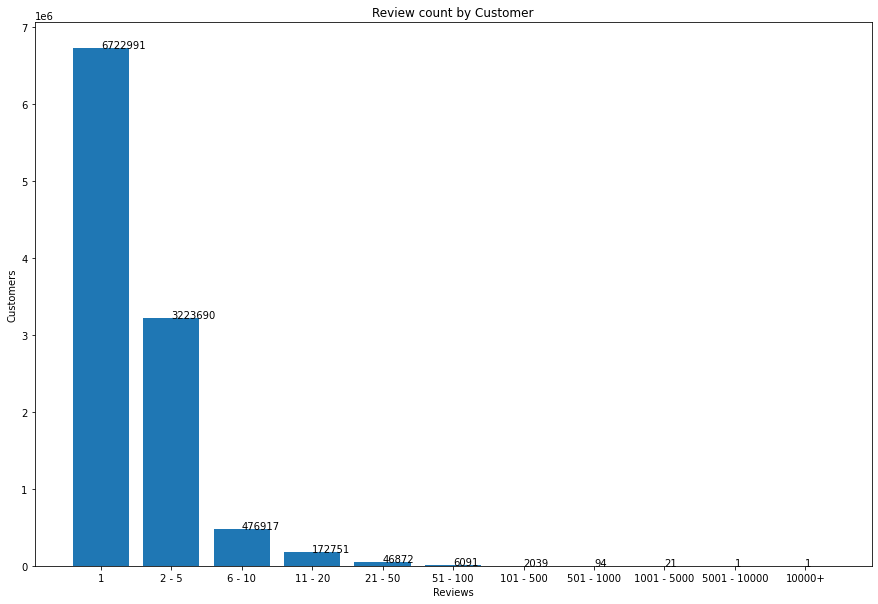

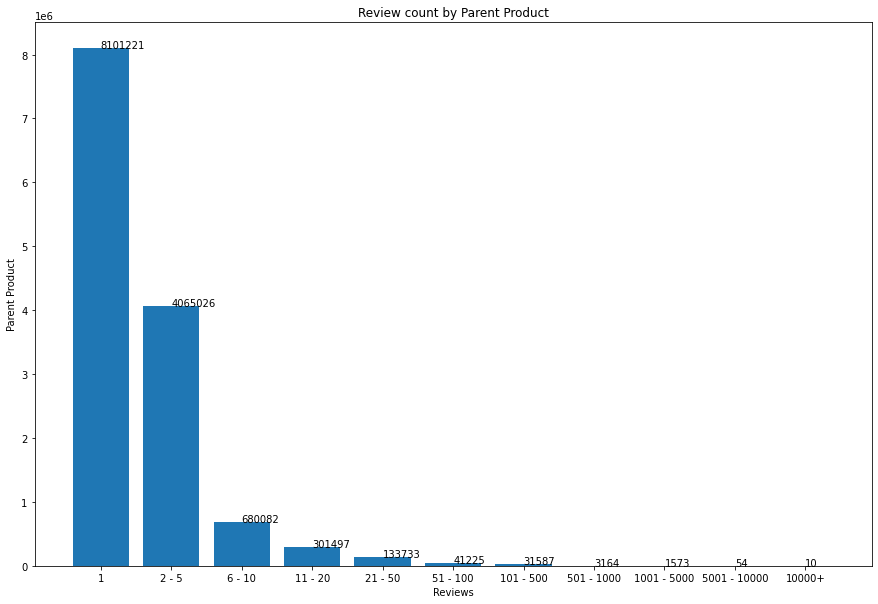

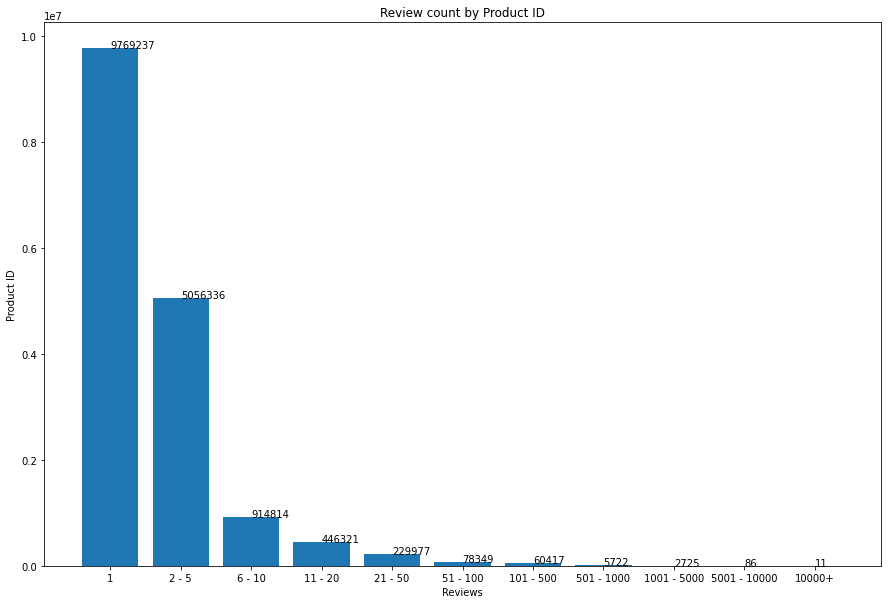

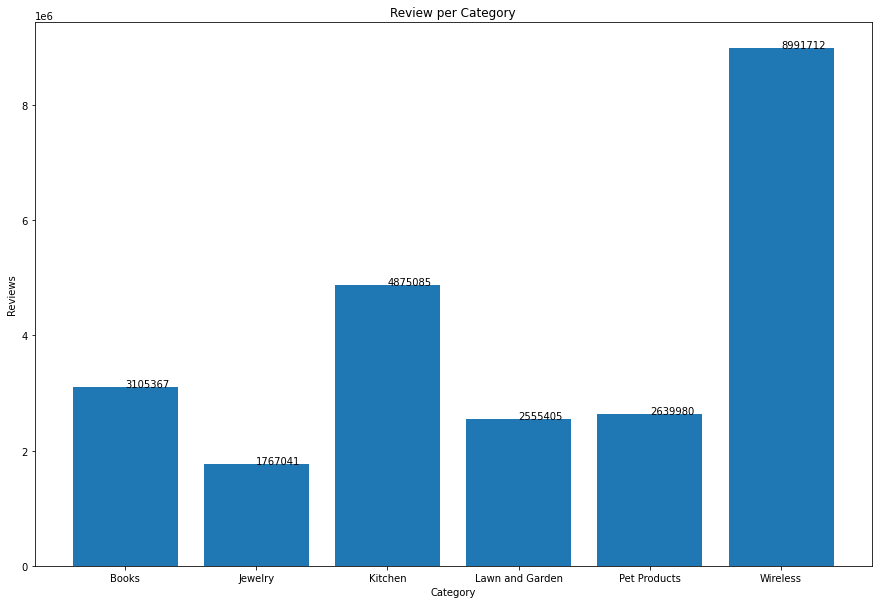

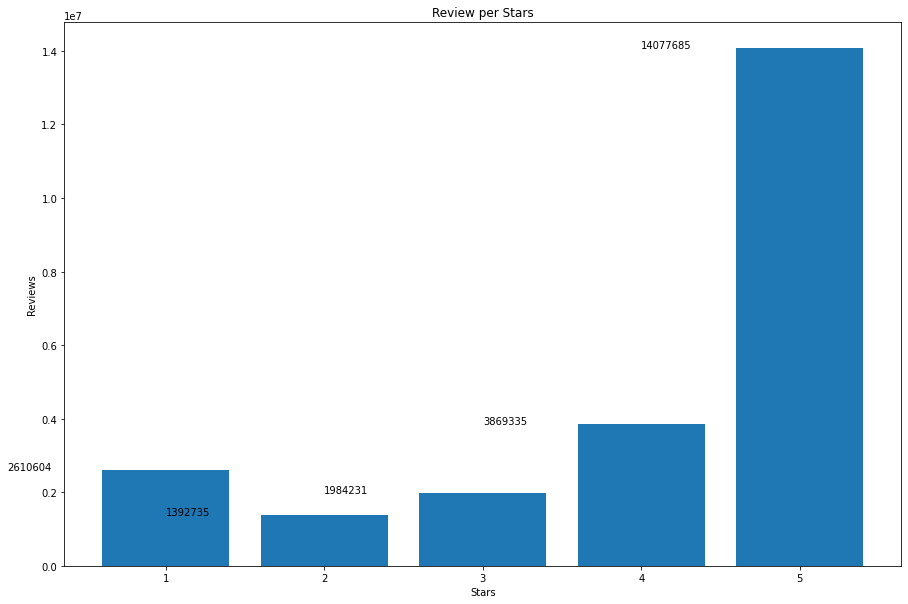

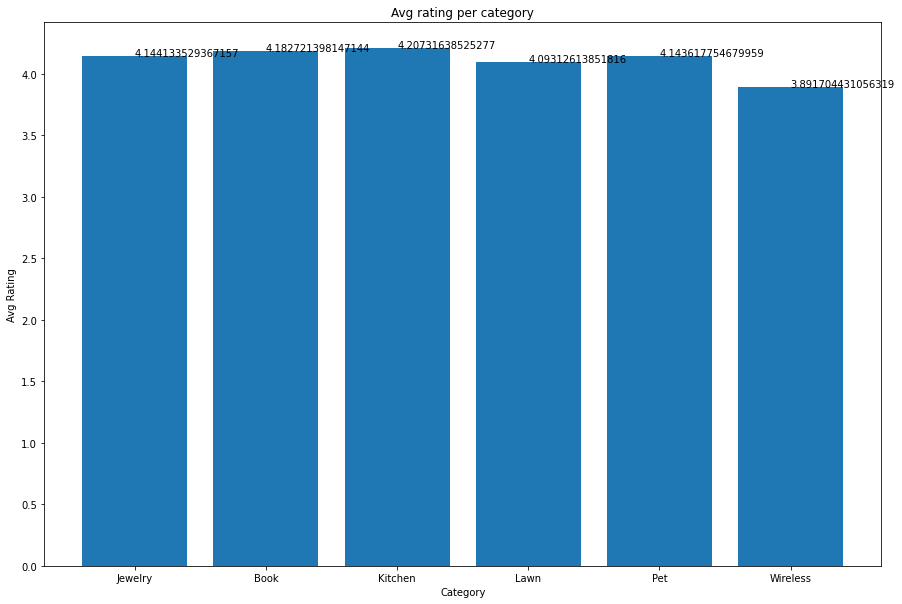

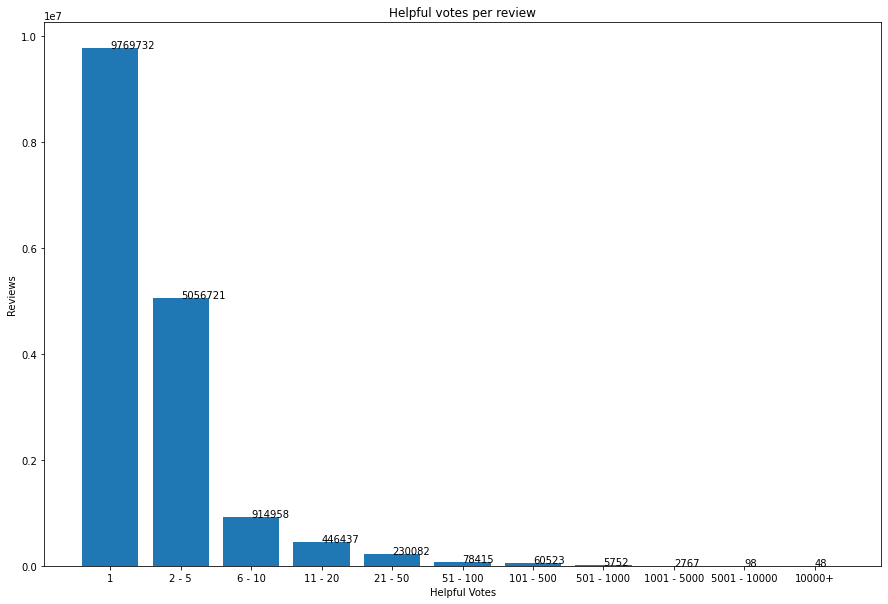

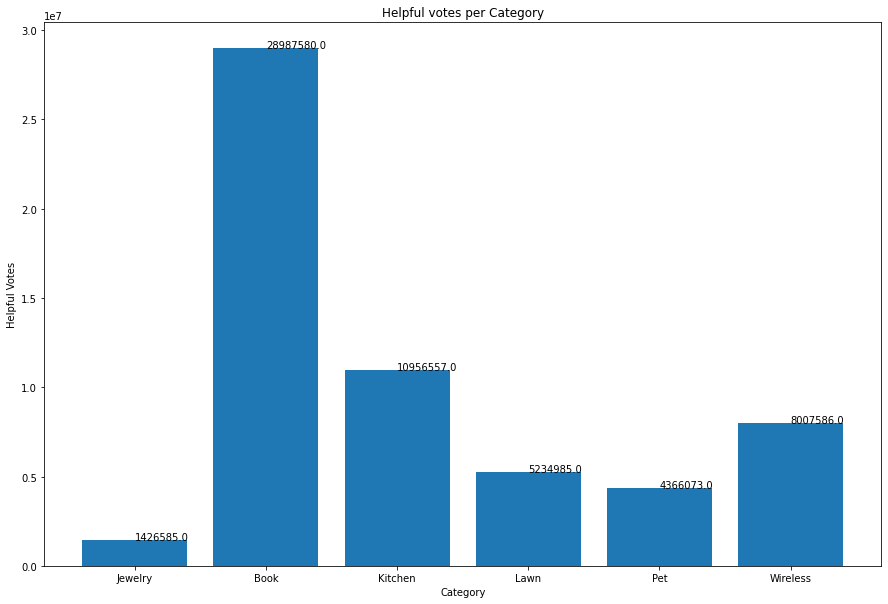

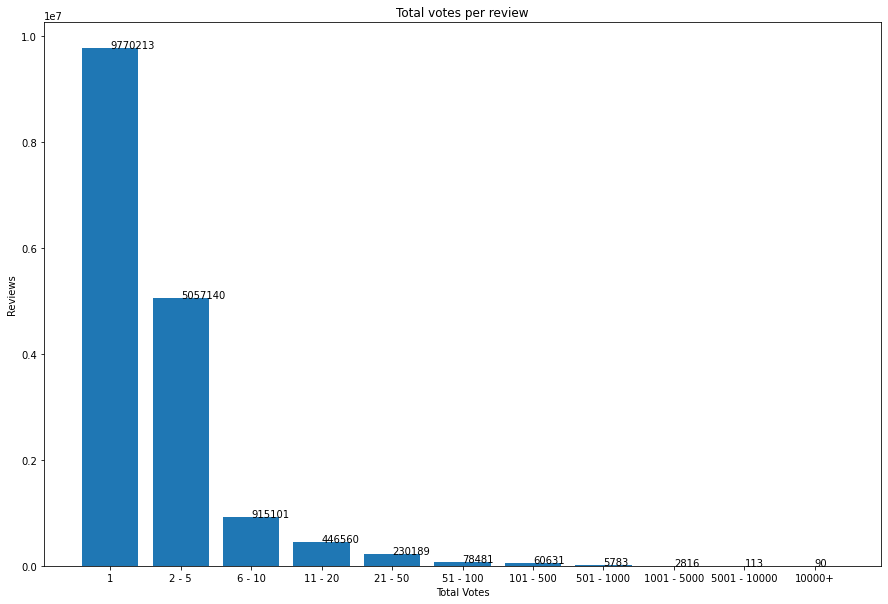

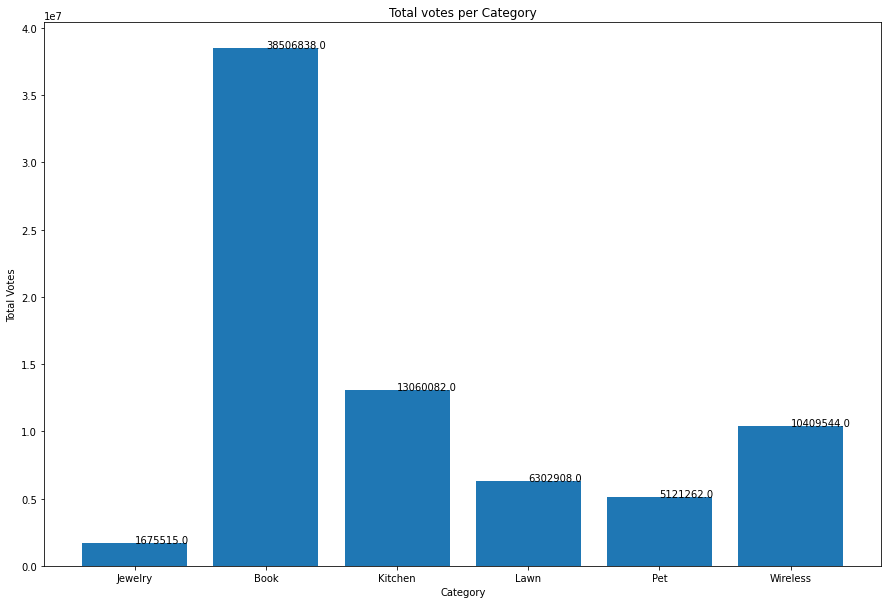

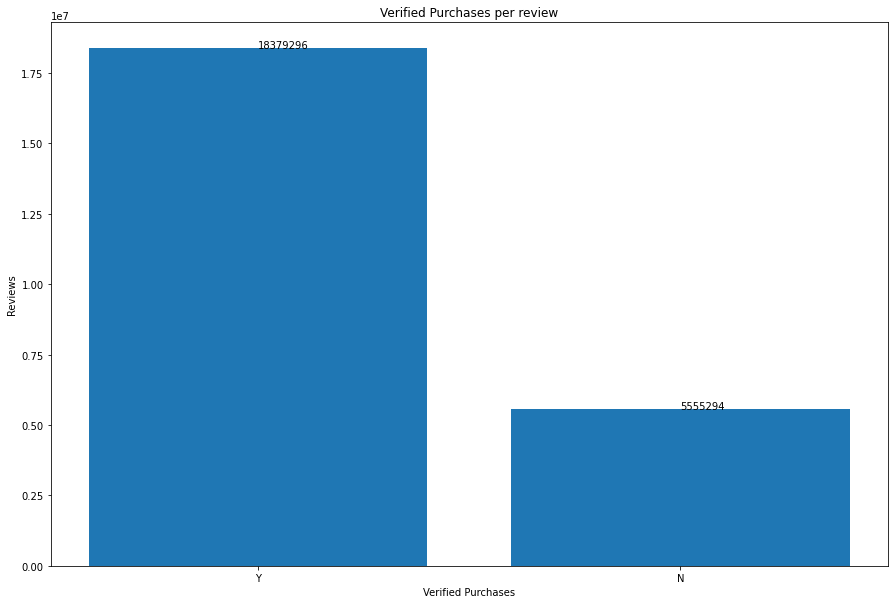

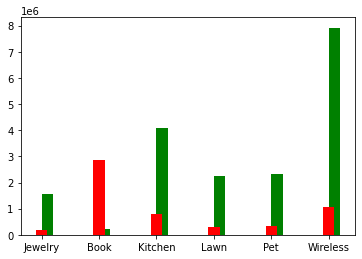

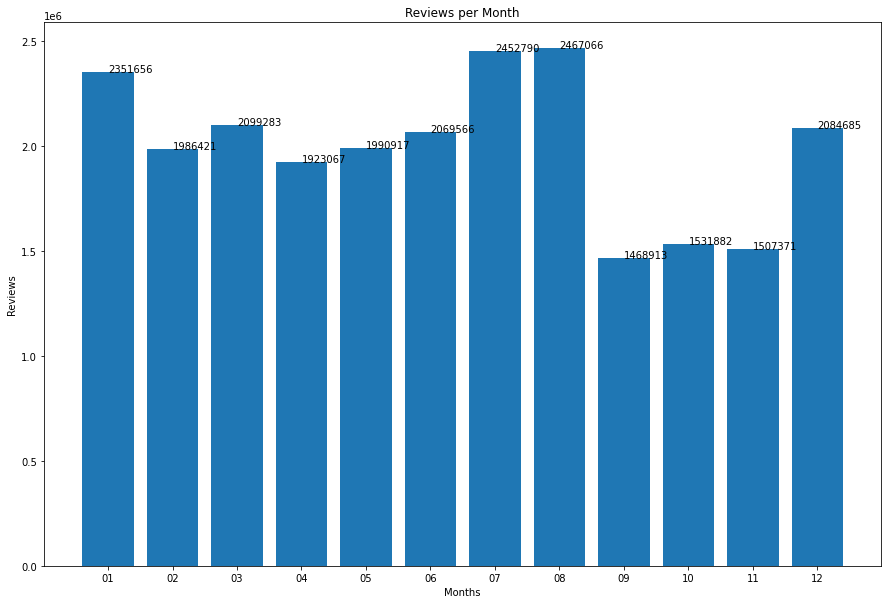

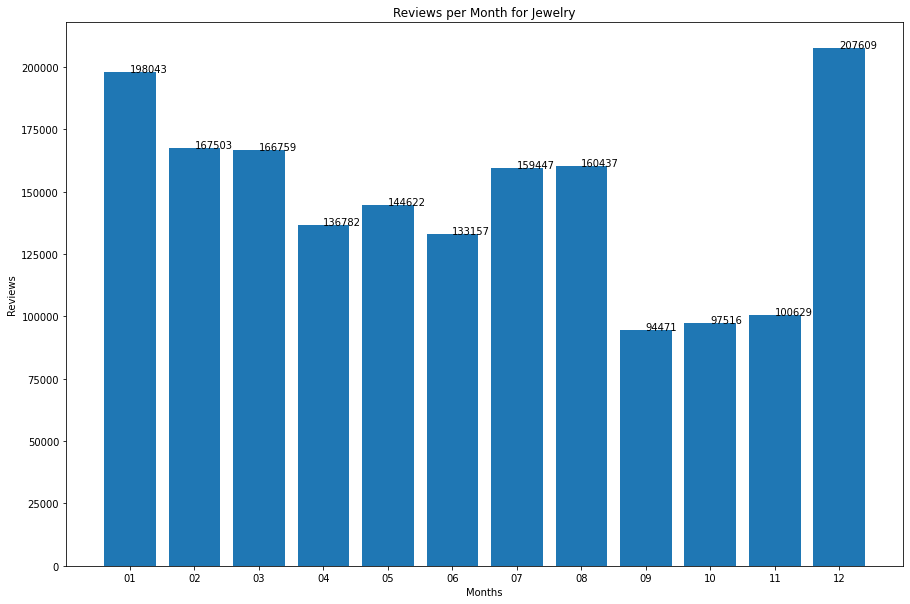

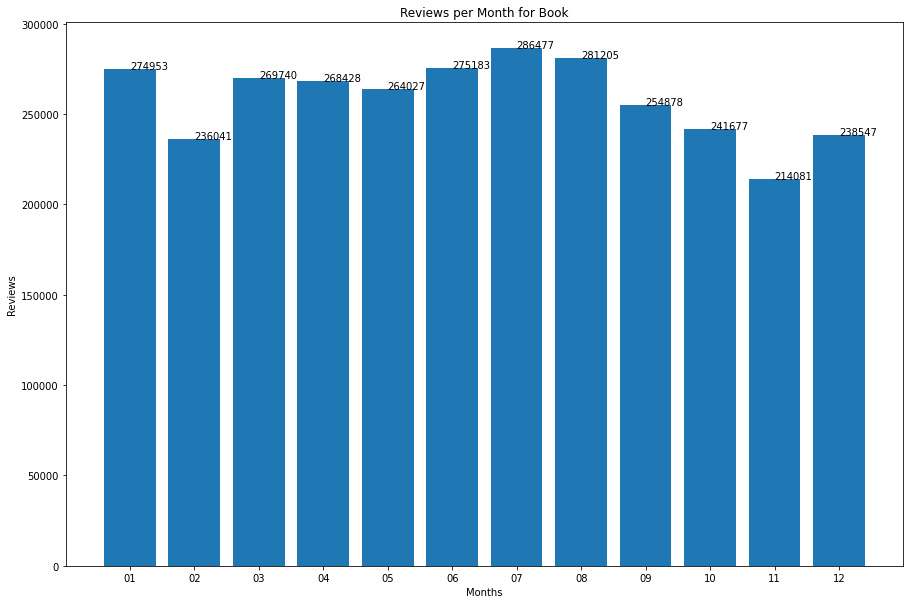

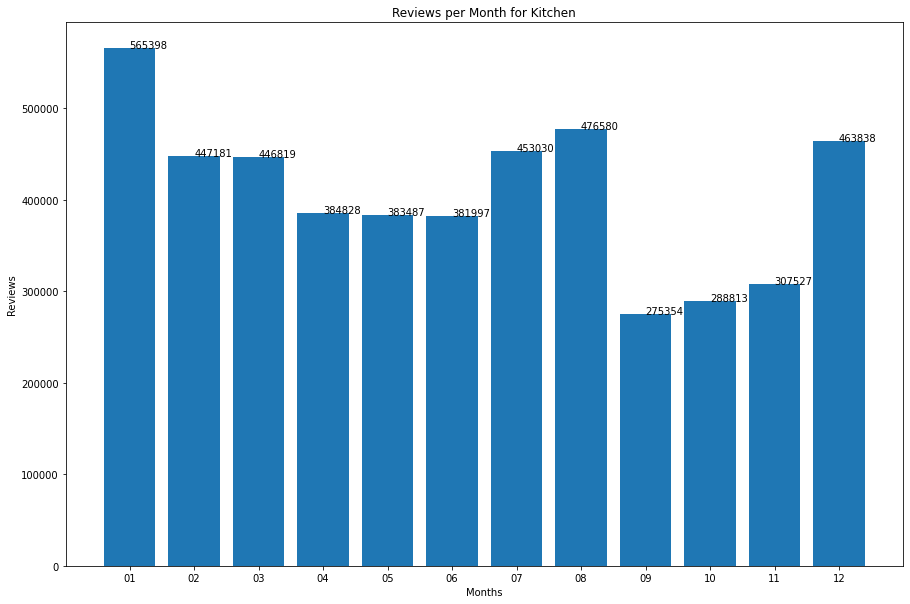

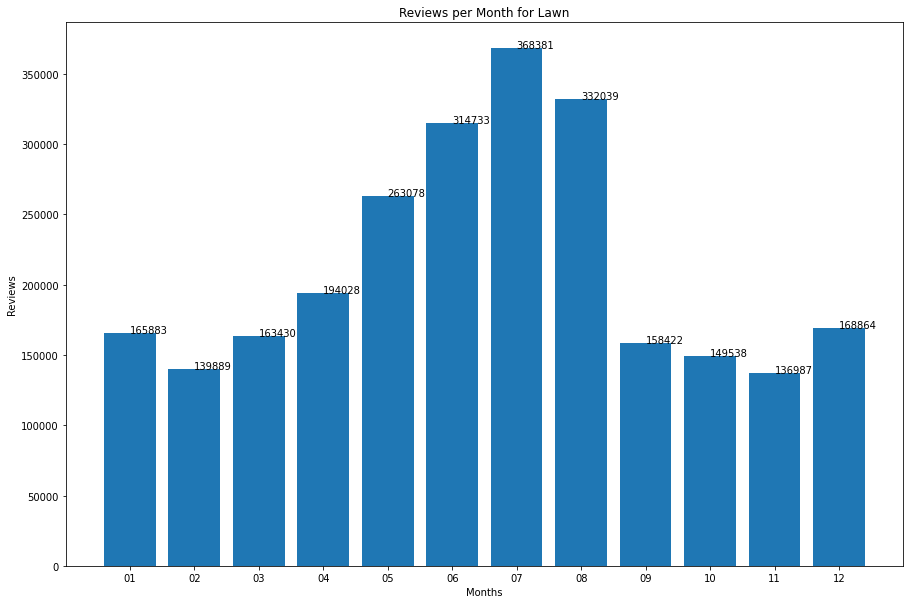

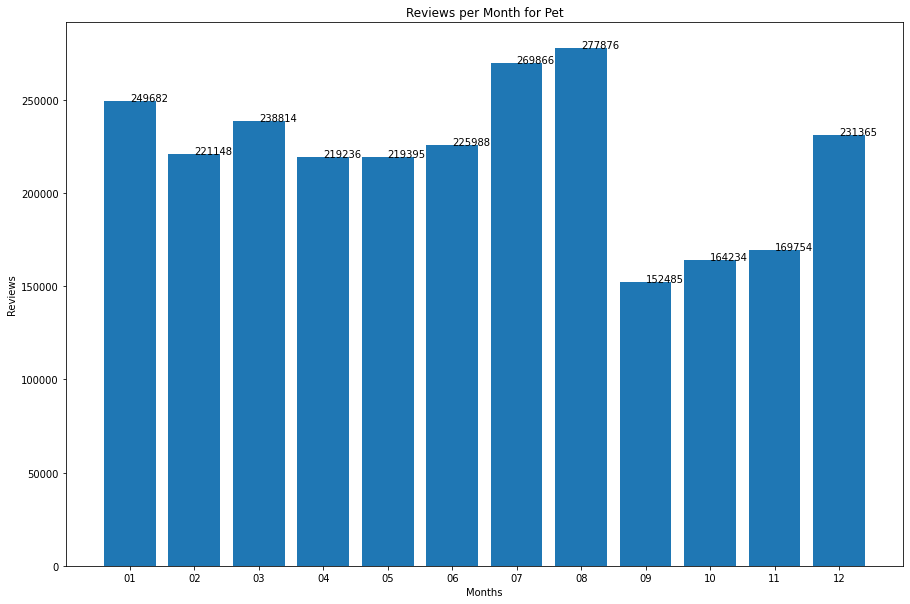

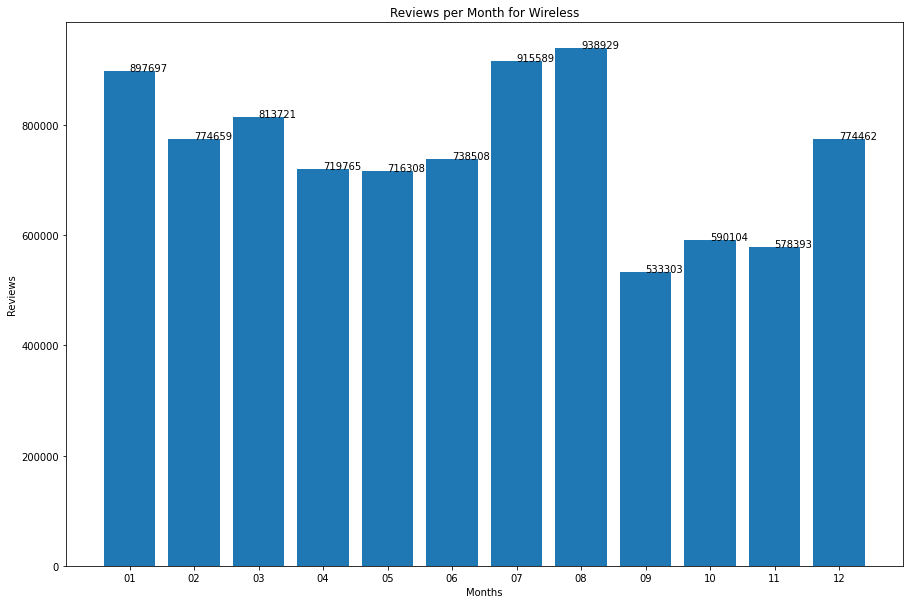

In [276]:
eda(reviews, frames)